In [263]:
%matplotlib inline

# Importacion y Exploracion de datos

In [264]:
# Importación de librerías
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv(r'C:\Users\crist\Downloads\CreditCardData.csv\CreditCardData.csv')

 # exploramos los datos
print("Tamaño del dataset:", df.shape) # Conocer la cantidad de filas y columnas con las que cuenta el dataset
print("Columnas:\n", df.columns) # Entrega los indices de cada columna
print("\nPrimeras filas:") 
print(df.head()) # Visualizamos las 5 primeras filas del dataset



Tamaño del dataset: (100000, 16)
Columnas:
 Index(['Transaction ID', 'Date', 'Day of Week', 'Time', 'Type of Card',
       'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')

Primeras filas:
  Transaction ID       Date Day of Week  Time Type of Card Entry Mode Amount  \
0      #3577 209  14-Oct-20   Wednesday    19         Visa        Tap     £5   
1      #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   £288   
2      #2694 780  14-Oct-20   Wednesday    14         Visa        Tap     £5   
3      #2640 960  13-Oct-20     Tuesday    14         Visa        Tap    £28   
4      #2771 031  13-Oct-20     Tuesday    23         Visa        CVC    £91   

  Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0                 POS  Entertainment         United Kingdom   United Kingdom   
1            

## Ver columnas y su Dtype(EDA)

In [265]:
#ver tipo de dtype de las columnas
df.dtypes

Transaction ID             object
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object

# Quitar simbolo libra a la columna Amount y quitar el # a la columna Transaction ID

In [266]:
# codigo que aplica la  fuincion replace para quittar el simbolo de la moneda y convertir a float
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)


In [267]:
# Eliminar el simobolo "#" de la columna Transaction ID, para poder cambiar el tipo de dato a entero
df['Transaction ID'] = df['Transaction ID'].str.replace('#', '', regex=False)
df['Transaction ID'] = df['Transaction ID'].str.replace(' ', '', regex=False)
df['Transaction ID'] = df['Transaction ID'].astype(int)

# Ver dtype de transaction

In [268]:
#corroborar que se hicieron los cambios
df.dtypes

Transaction ID              int32
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                    float64
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object

In [269]:
#ver los primeros 10 registros del dataframe
df.head(10)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,3446698,13-Oct-20,Tuesday,20,MasterCard,Tap,30.0,POS,Children,India,India,India,M,48.4,Monzo,0
6,3652191,13-Oct-20,Tuesday,18,Visa,CVC,231.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,3161927,13-Oct-20,Tuesday,18,MasterCard,CVC,154.0,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,3025809,13-Oct-20,Tuesday,23,MasterCard,PIN,39.0,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,3413696,14-Oct-20,Wednesday,23,MasterCard,Tap,17.0,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


# Ver si alguna columna tiene valores nulos

In [270]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any() # Toma el valor True si existen valores nulos
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any() # Toma el valor True si la columna tiene valores nulos
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull() 


¿Hay valores faltantes en la base de datos? True
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                     True
Type of Transaction       False
Merchant Group             True
Country of Transaction    False
Shipping Address           True
Country of Residence      False
Gender                     True
Age                       False
Bank                      False
Fraud                     False
dtype: bool


# Aplicar nan a celdas sin valor 

In [271]:
#definir las columnas con valores nulos
col_nulos= df.columns[df.isnull().any()] # Guardamos las columnas con valores nulos

# Aplicar imputación:

for col in col_nulos:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(np.nan) # Asignar valor nan a los valores nulos
    else:
        df[col] = df[col].fillna(0) # Los valores numericos faltantes son reemplazados por 0

# Verificar que ya no haya valores nulos en columnas numéricas
rectificar = df[col_nulos].isnull().sum()

In [272]:
rectificar

Amount               0
Merchant Group      10
Shipping Address     5
Gender               4
dtype: int64

# Verificar si queda otra columna con valores nulos

In [273]:
# repetimos el paso anterior
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()

¿Hay valores faltantes en la base de datos? True
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                    False
Type of Transaction       False
Merchant Group             True
Country of Transaction    False
Shipping Address           True
Country of Residence      False
Gender                     True
Age                       False
Bank                      False
Fraud                     False
dtype: bool


# realizar un remplazamos NaN con Missing

In [274]:
# Los valores nulos restantes son cambiados por Missing
df['Merchant Group'].fillna('Missing', inplace=True)
df['Shipping Address'].fillna('Missing', inplace=True)
df['Gender'].fillna('Missing', inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_15892\333453399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Merchant Group'].fillna('Missing', inplace=True)
C:\Users\crist\AppData\Local\Temp\ipykernel_15892\333453399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# Rectificamos

In [275]:
# volvemos a realizar la verificación de valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()

¿Hay valores faltantes en la base de datos? False
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                    False
Type of Transaction       False
Merchant Group            False
Country of Transaction    False
Shipping Address          False
Country of Residence      False
Gender                    False
Age                       False
Bank                      False
Fraud                     False
dtype: bool


In [276]:
# usamos describe para ver las estadisticas de las columnas numericas
df.describe()

,Transaction ID,Time,Amount,Age,Fraud
count,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000
mean,3.117139e+06,14.562870,112.57176,44.993770,0.071950
std,3.296291e+05,5.308195,123.43327,9.948494,0.258406
min,2.546884e+06,0.000000,0.00000,15.000000,0.000000
25%,2.830516e+06,10.000000,17.00000,38.200000,0.000000
50%,3.118534e+06,15.000000,30.00000,44.900000,0.000000
75%,3.402841e+06,19.000000,208.00000,51.700000,0.000000
max,3.687455e+06,24.000000,400.00000,86.100000,1.000000


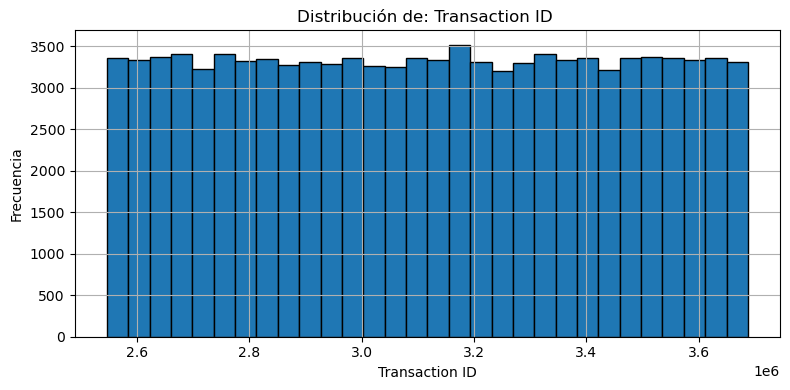

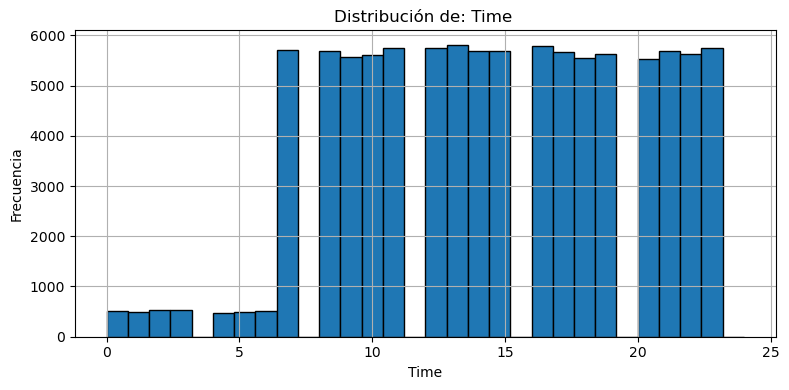

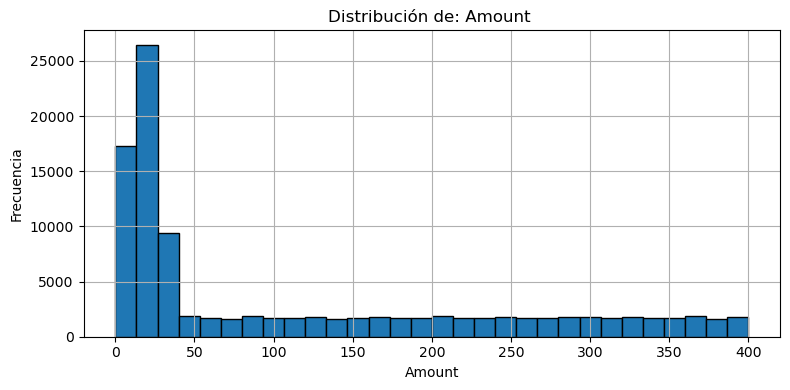

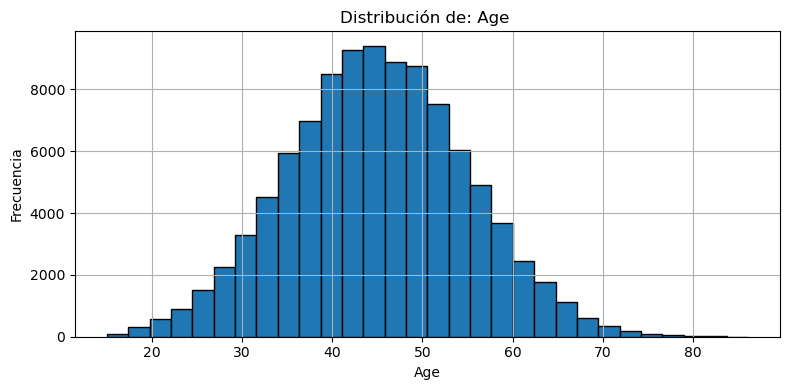

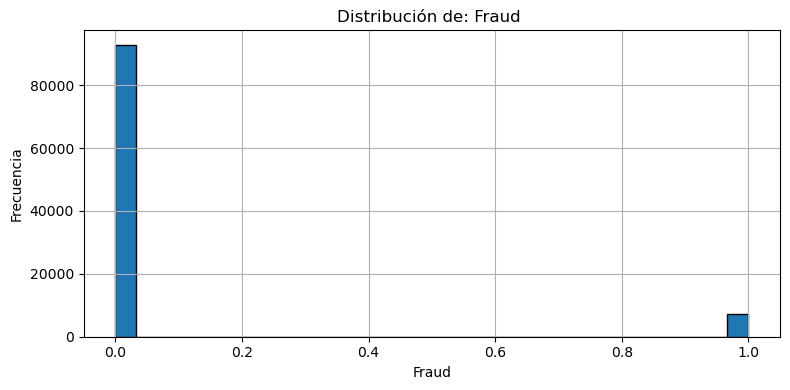

In [277]:
# realizar graficas de distribucion de las columnas numericas
for col in ["Transaction ID","Time", "Amount", "Age", "Fraud"]:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribución de: {col} ')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [278]:
#crear un nuevo DataFrame con las columnas categóricas
df_categoricas = df.select_dtypes(include=['object'])

# Verificar el nuevo DataFrame
print("Columnas categóricas seleccionadas:")
print(df_categoricas.columns)



Columnas categóricas seleccionadas:
Index(['Date', 'Day of Week', 'Type of Card', 'Entry Mode',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Shipping Address', 'Country of Residence', 'Gender', 'Bank'],
      dtype='object')


In [279]:
# Mostrar las primeras filas
df_categoricas.head()

,Date,Day of Week,Type of Card,Entry Mode,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Bank
0,14-Oct-20,Wednesday,Visa,Tap,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,RBS
1,14-Oct-20,Wednesday,MasterCard,PIN,POS,Services,USA,USA,USA,F,Lloyds
2,14-Oct-20,Wednesday,Visa,Tap,POS,Restaurant,India,India,India,F,Barclays
3,13-Oct-20,Tuesday,Visa,Tap,POS,Entertainment,United Kingdom,India,United Kingdom,F,Barclays
4,13-Oct-20,Tuesday,Visa,CVC,Online,Electronics,USA,USA,United Kingdom,M,Halifax


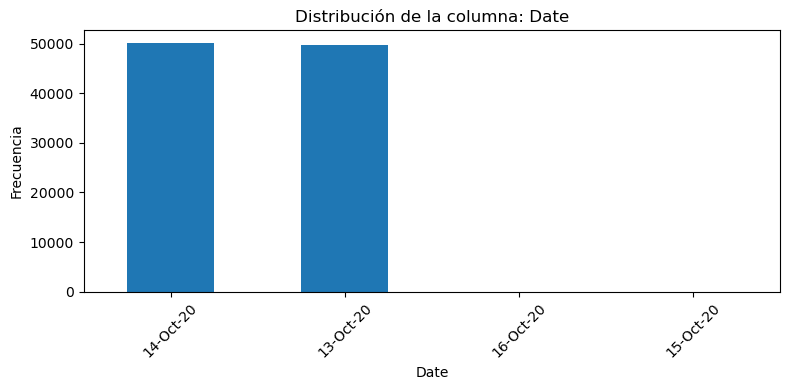

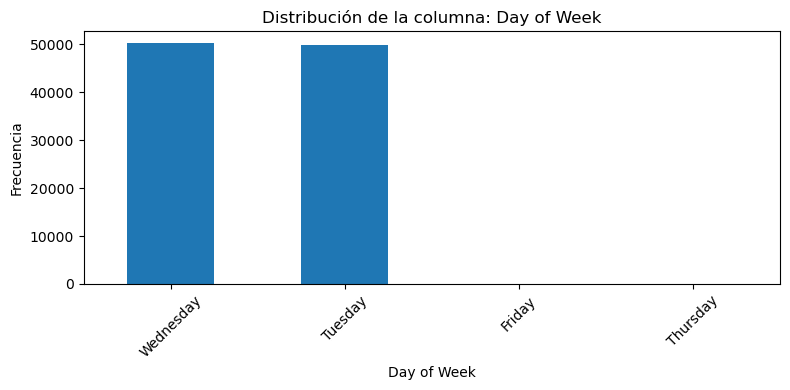

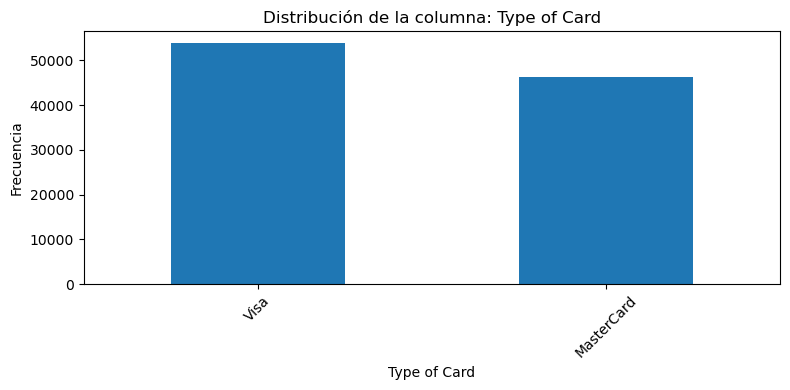

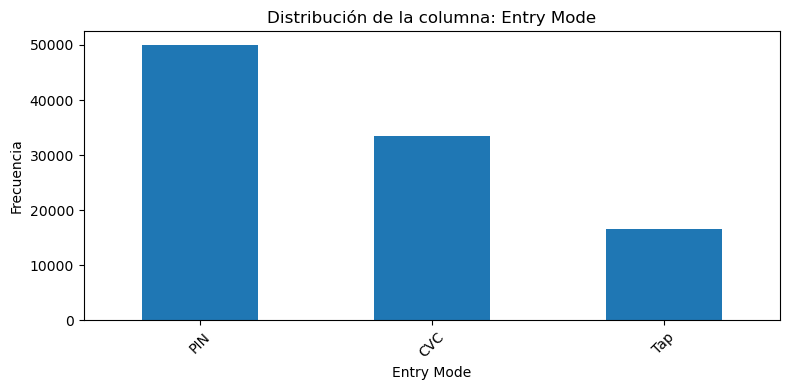

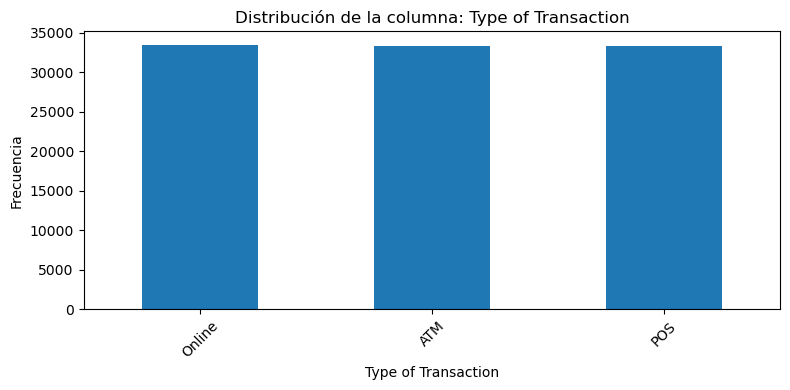

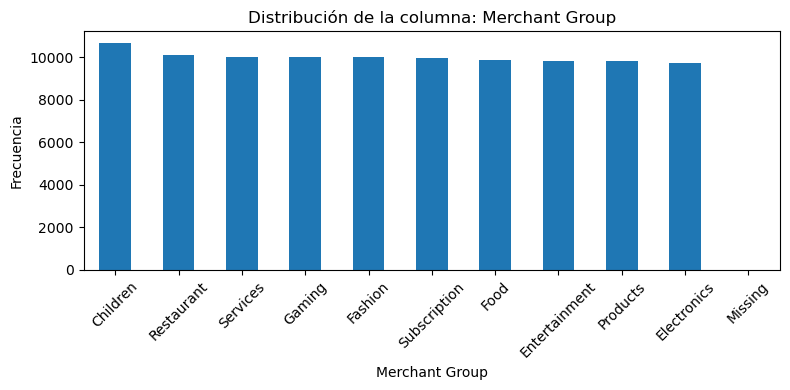

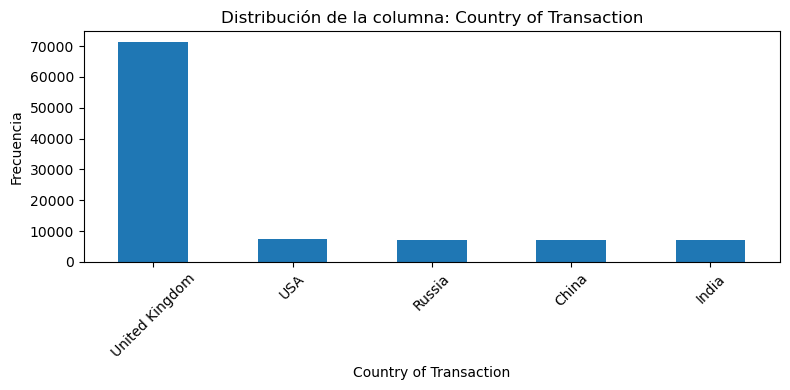

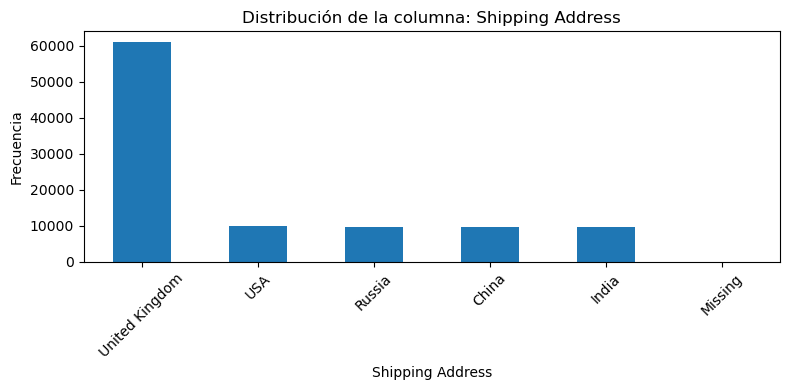

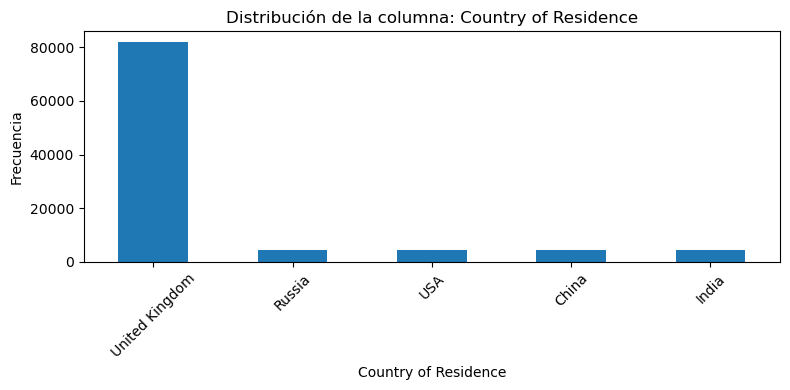

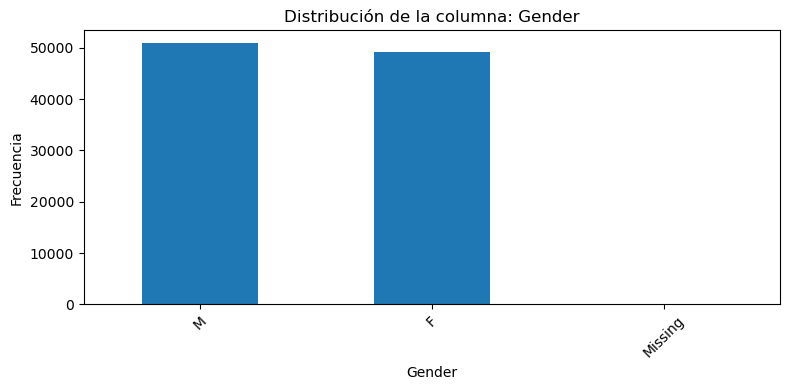

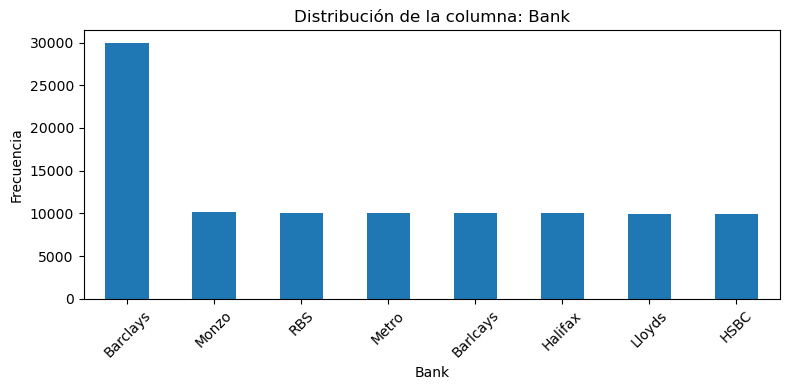

In [280]:
#graficar la distribución de las columnas categóricas
for col in df_categoricas.columns:
    plt.figure(figsize=(8, 4))
    df_categoricas[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribución de la columna: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# creamos una columna t_internacional con la finalidad si se hace la trasanccion fuera de la region del dueño de la tarjeta

In [281]:
#Realizamos una nueva columna que indique si la transacción es internacional
df['t_internacional'] = df['Country of Transaction'] != df['Country of Residence']

In [282]:
# rectificar que se hizo la columna
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False


otro factor importante es que podriamos crear una variable r_hora para ver el rango de  horas que se hace la transaccion, segun yo es importante ya que el fraude podria realizarse en la noche y las personas duermen y se cometen más fechorias, ademas de eso puede ser porque la trasanccion se hizo en otro lugar es decir con zona horaria distinta.

Tambien, nos permite conocer cuanto tiempo tardo en realizarse la transaccion fraudulenta, de esta manera podemos establecer relaciones como la gravedad del fraude en realcion al tiempo de ejecucion.

In [283]:
# creamos una función para clasificar la hora de la transacción
# otro factor importante es que podriamos crear una variable r_hora para ver el rango
def clasificar_hora(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['r_hora'] = df['Time'].apply(clasificar_hora)

In [284]:
# Mostrar el DataFrame actualizado
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional,r_hora
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,Noche
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,Tarde
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,Tarde
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,Tarde
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False,Noche
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False,Noche
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False,Mañana
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False,Noche


In [285]:
df['comparacion_direc'] = df['Shipping Address'] == df['Country of Residence']

In [286]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional,r_hora,comparacion_direc
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,Noche,True
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,Tarde,True
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,Tarde,True
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,Tarde,False
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True,Noche,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False,Noche,True
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False,Noche,True
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False,Mañana,True
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False,Noche,True


antes de entrenar el modelo veremos si hay valores nan ya que apesar que  no hay nulos estos estan rellenados algunos con nan posiblemente

In [287]:
# Contar valores nulos por columna en el DataFrame completo
nan_df = df.isnull().sum()

# Filtrar y mostrar solo las columnas que tienen al menos un NaN
nan_col_df = nan_df[nan_df > 0].sort_values(ascending=False)

# Mostrar resultado
print("Columnas con valores NaN en df (antes del modelado):")
print(nan_col_df)

Columnas con valores NaN en df (antes del modelado):
Series([], dtype: int64)


no hay nan xD

In [288]:
df.dtypes


Transaction ID              int32
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                    float64
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
t_internacional              bool
r_hora                     object
comparacion_direc            bool
dtype: object

In [289]:
## Convertir la columna 'r_hora' a tipo string
df['r_hora'] = df['r_hora'].astype(str)

In [290]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional,r_hora,comparacion_direc
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,Noche,True
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,Tarde,True
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,Tarde,True
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,Tarde,False
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True,Noche,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False,Noche,True
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False,Noche,True
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False,Mañana,True
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False,Noche,True


In [291]:
# Seleccionar las columnas relevantes para el análisis
dfx = df[['Amount', 'Age', 't_internacional', 'r_hora', 'comparacion_direc']]


In [292]:
dfx

,Amount,Age,t_internacional,r_hora,comparacion_direc
0,5.0,25.2,False,Noche,True
1,288.0,49.6,False,Tarde,True
2,5.0,42.2,False,Tarde,True
3,28.0,51.0,False,Tarde,False
4,91.0,38.0,True,Noche,False
...,...,...,...,...,...
99995,15.0,53.8,False,Noche,True
99996,7.0,45.0,False,Noche,True
99997,21.0,46.5,False,Mañana,True
99998,25.0,48.2,False,Noche,True


pasamos las columnas t_internacional, r_hora,comparacion_direc a valores numericos ya que son datos importantes 

In [293]:
# Codificar booleanos a 0 y 1
dfx['t_internacional'] = dfx['t_internacional'].astype(int)
dfx['comparacion_direc'] = dfx['comparacion_direc'].astype(int)

# Codificar r_hora (Noche, Tarde, Mañana) a valores numéricos
mapa_hora = {'Mañana': 0, 'Tarde': 1, 'Noche': 2}
dfx['r_hora'] = dfx['r_hora'].map(mapa_hora)

C:\Users\crist\AppData\Local\Temp\ipykernel_15892\2232074192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['t_internacional'] = dfx['t_internacional'].astype(int)
C:\Users\crist\AppData\Local\Temp\ipykernel_15892\2232074192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['comparacion_direc'] = dfx['comparacion_direc'].astype(int)
C:\Users\crist\AppData\Local\Temp\ipykernel_15892\2232074192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [294]:
dfx

,Amount,Age,t_internacional,r_hora,comparacion_direc
0,5.0,25.2,0,2.0,1
1,288.0,49.6,0,1.0,1
2,5.0,42.2,0,1.0,1
3,28.0,51.0,0,1.0,0
4,91.0,38.0,1,2.0,0
...,...,...,...,...,...
99995,15.0,53.8,0,2.0,1
99996,7.0,45.0,0,2.0,1
99997,21.0,46.5,0,0.0,1
99998,25.0,48.2,0,2.0,1


# Crear modelos y entrenarlos

In [295]:
# importar las librerias necesarias para el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [296]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = dfx.copy()  
y = df['Fraud']   # Variable objetivo

#Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [297]:
# Escalar las características numéricas
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [298]:
#Inicializar el modelo
tree_model = DecisionTreeClassifier(class_weight={0:1, 1:10}, random_state=42) # Le damos mas peso a la categoria Fraude, ya que cuenta con menos datos

#Entrenar el modelo
tree_model.fit(x_train, y_train)

#Predecir con los datos de prueba
y_pred1 = tree_model.predict(x_test)




# Utilizaremos la ventaja que nos entrega DecisionTree y visualizaremos el arbol generado, pero con la imagen truncada debido al consumo de recursos

In [299]:
#importar la libreria para ver el arbol de decision
from sklearn import tree

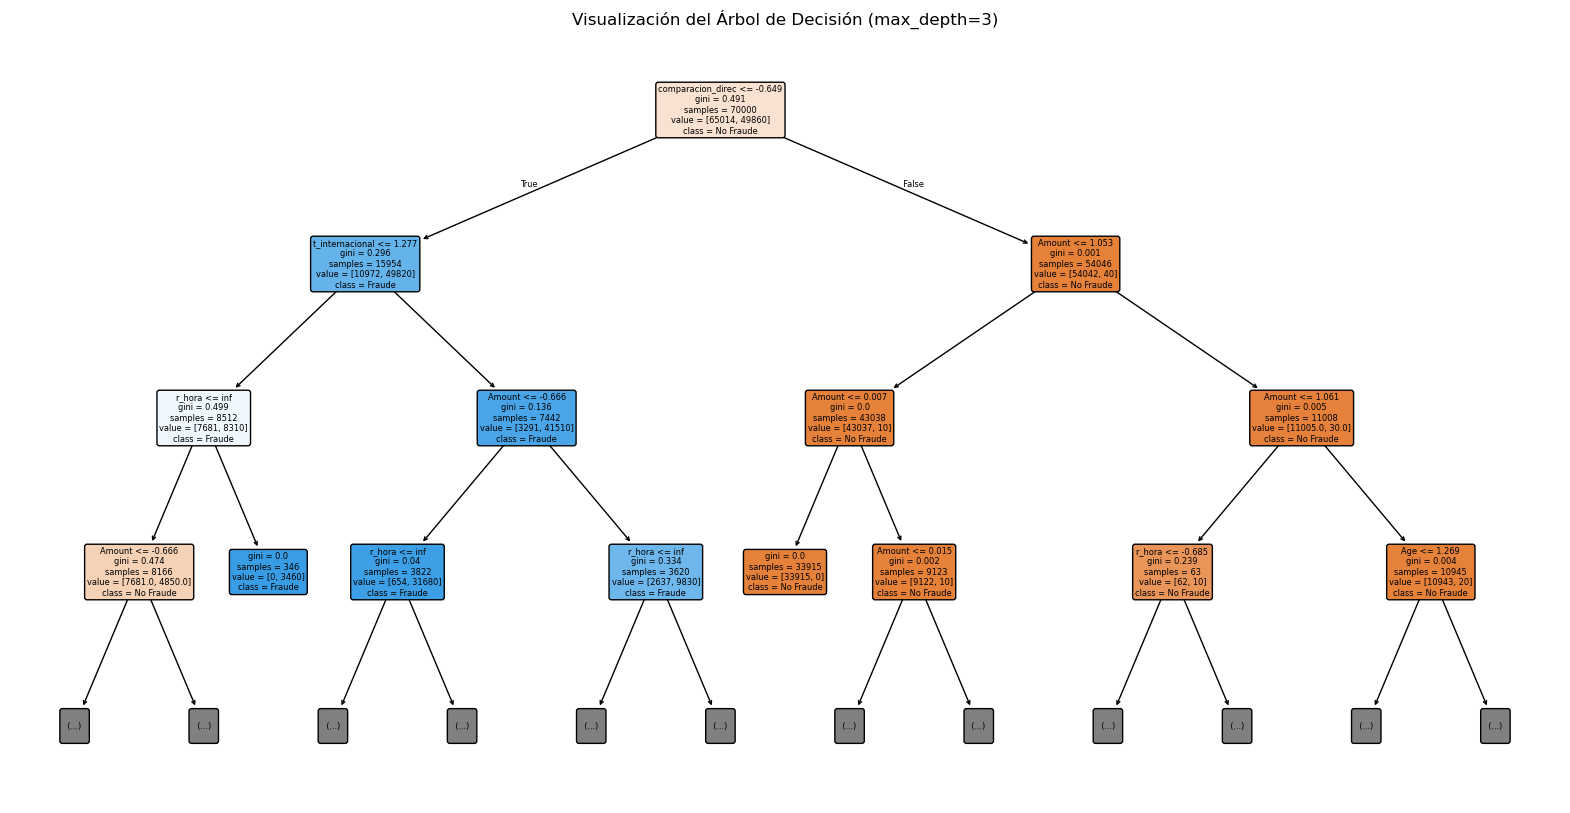

In [300]:
#graficar el arbol de decision
plt.figure(figsize=(20, 10))  # Tamaño del gráfico
tree.plot_tree(
    tree_model,                
    feature_names=X.columns,   # nombres de las columnas del dataset
    class_names=['No Fraude', 'Fraude'],  # clases
    filled=True,               # poner colores en los nodos según la clase
    rounded=True,              # bordes redondeados
    max_depth=3                # <== limita profundidad visual (puedes ajustar)
)
plt.title("Visualización del Árbol de Decisión (max_depth=3)")
plt.show()

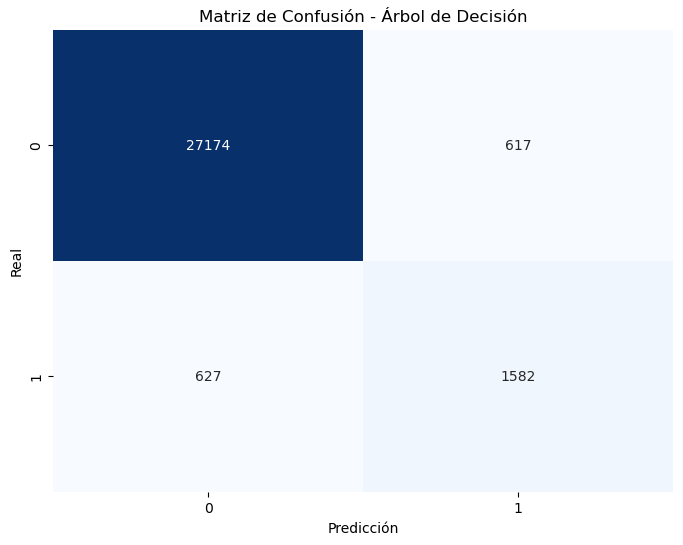

Accuracy: 0.9585333333333333

Reporte de Clasificación:
              precision    recall  f1-score   support

    Legítima       0.98      0.98      0.98     27791
      Fraude       0.72      0.72      0.72      2209

    accuracy                           0.96     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.96      0.96      0.96     30000

ROC-AUC: 0.9858007660784429


In [301]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred1)

#Visualización de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

#Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred1, target_names=['Legítima', 'Fraude']))
print("ROC-AUC:", roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1]))

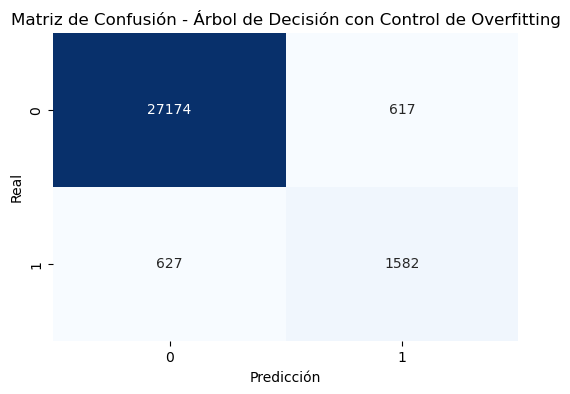

Accuracy: 0.9585333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27791
           1       0.72      0.72      0.72      2209

    accuracy                           0.96     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.96      0.96      0.96     30000

ROC-AUC: 0.9858007660784429


In [302]:
# Inicializar el modelo con parámetros que previenen overfitting
tree_model1 = DecisionTreeClassifier(
    max_depth=5,                # Limita la profundidad
    min_samples_split=30,       # Mínimas muestras para dividir
    min_samples_leaf=10,        # Mínimas muestras en hoja
    max_leaf_nodes=20,          # Máximo de nodos hoja
    class_weight={0:1, 1:10},    # Ajuste por desbalanceo, dandole mas peso a los fraudes
    random_state=42
)

# Entrenar el modelo
tree_model1.fit(x_train, y_train)

# Predecir
y_pred2 = tree_model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol de Decisión con Control de Overfitting")
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1]))

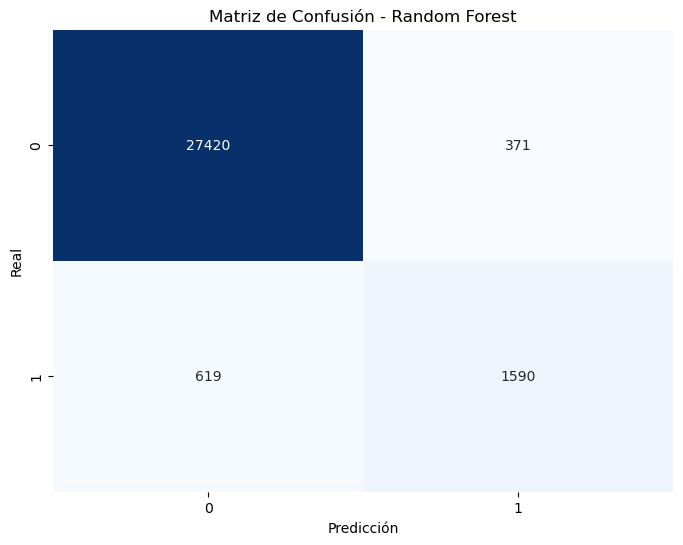

Accuracy (Random Forest): 0.967

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27791
           1       0.81      0.72      0.76      2209

    accuracy                           0.97     30000
   macro avg       0.89      0.85      0.87     30000
weighted avg       0.97      0.97      0.97     30000

ROC-AUC: 0.9858007660784429


In [303]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo Random Forest SIN control de overfitting
rf_model1 = RandomForestClassifier(class_weight={0:1, 1:10}, random_state=42) # Le damos mas peso a los fraudes
rf_model1.fit(x_train, y_train)


y_pred_rf = rf_model1.predict(x_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Métricas de evaluación
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1]))


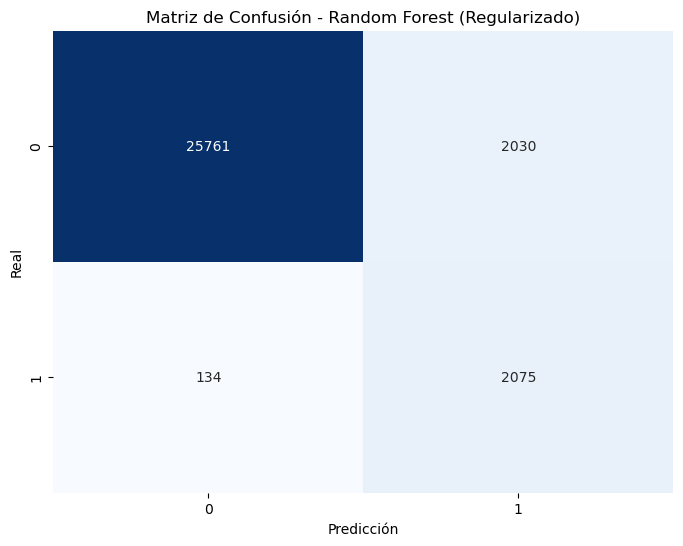

Accuracy (RF con control de overfitting): 0.9278666666666666

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     27791
           1       0.51      0.94      0.66      2209

    accuracy                           0.93     30000
   macro avg       0.75      0.93      0.81     30000
weighted avg       0.96      0.93      0.94     30000

ROC-AUC: 0.9858007660784429


In [304]:

# Modelo con control de sobreajuste
rf_model = RandomForestClassifier(
    n_estimators=100,         
    max_depth=10,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    max_features='sqrt',     
    class_weight={0:1, 1:10}, # le damos mas peso a los fraudes 
    random_state=42
)

# Entrenamiento
rf_model.fit(x_train, y_train)

# Predicción
y_pred_rf1 = rf_model.predict(x_test)

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf1)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest (Regularizado)')
plt.show()

# Métricas
print("Accuracy (RF con control de overfitting):", accuracy_score(y_test, y_pred_rf1))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf1))
print("ROC-AUC:", roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1]))

In [305]:
# Crear diccionario de métricas
metricas_modelos = {
    'Árbol sin control': {
        'Accuracy': accuracy_score(y_test, y_pred1),
        'Precision': classification_report(y_test, y_pred1, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred1, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred1, output_dict=True)['1']['f1-score'],
    },
    'Árbol con control': {
        'Accuracy': accuracy_score(y_test, y_pred2),
        'Precision': classification_report(y_test, y_pred2, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred2, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred2, output_dict=True)['1']['f1-score'],
    },
    'RF sin control': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
    },
    'RF con control': {
        'Accuracy': accuracy_score(y_test, y_pred_rf1),
        'Precision': classification_report(y_test, y_pred_rf1, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred_rf1, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred_rf1, output_dict=True)['1']['f1-score'],
    }
}

In [306]:
df_metricas = pd.DataFrame(metricas_modelos).T

In [307]:
df_metricas

,Accuracy,Precision,Recall,F1-score
Árbol sin control,0.958533,0.719418,0.716161,0.717786
Árbol con control,0.958533,0.719418,0.716161,0.717786
RF sin control,0.967000,0.810811,0.719783,0.762590
RF con control,0.927867,0.505481,0.939339,0.657270


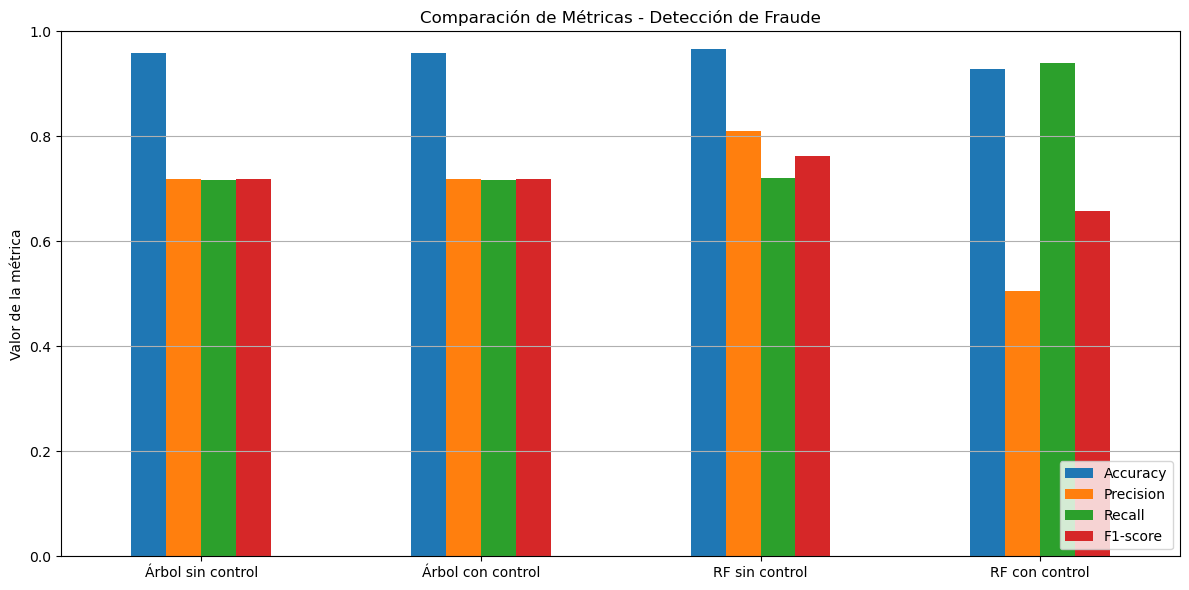

In [308]:
# graficamos las diferencias que existen entre las metricas de desepeño de los modelos
df_metricas.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas - Detección de Fraude')
plt.ylabel('Valor de la métrica')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [309]:
# Creamos una lista con los distintos modelos aplicados
models = {
    'arbol sin control': tree_model,
    'arbol con control': tree_model1,
    'random forest sin control': rf_model1,
    'random forest con control': rf_model,
}

In [259]:
from sklearn.metrics import roc_auc_score

auc_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]  # Probabilidad de fraude
    auc_score = roc_auc_score(y_test, y_score)
    auc_scores[model_name] = auc_score
    print(f'AUC de {model_name}: {auc_score:.2f}')


AUC de arbol sin control: 0.85
AUC de arbol con control: 0.99
AUC de random forest sin control: 0.97
AUC de random forest con control: 0.99


In [260]:
from sklearn.metrics import roc_curve, auc

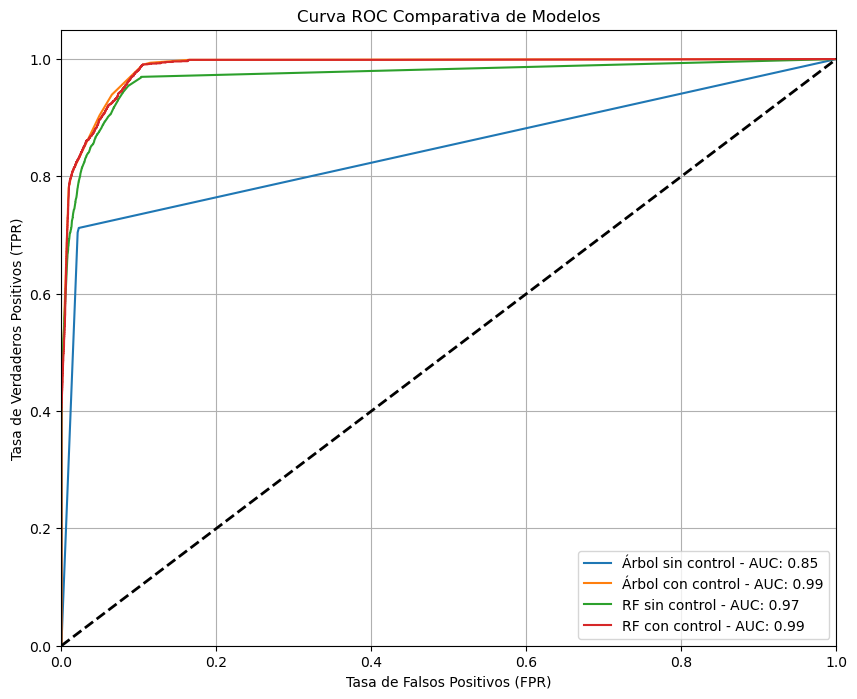

In [261]:
plt.figure(figsize=(10, 8))

modelos = {
    'Árbol sin control': tree_model,
    'Árbol con control': tree_model1,
    'RF sin control': rf_model1,
    'RF con control': rf_model
}

for nombre, modelo in modelos.items():
    # Obtener probabilidad para clase 1 (fraude)
    y_score = modelo.predict_proba(X_test)[:, 1]
    
    # Calcular FPR, TPR y AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    
    # Graficar
    plt.plot(fpr, tpr, label=f'{nombre} - AUC: {auc_score:.2f}')

# Línea base
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [262]:
#ver si ha conflictos